#**What is ARIMA?**
`ARIMA` stands for `Autoregressive Integrated Moving Average`. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(`p`, `d`, `q`). Here `p`, `d`, and `q` are defined as:

`p` is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.

`d` represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.

`q` is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

In [2]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [3]:
data = yf.download('GOOG',
                      start = start_date,
                      end = end_date,
                      progress = False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop = True, inplace = True)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-17,92.779999,92.970001,90.839996,92.160004,92.160004,22935800
1,2023-01-18,92.940002,93.587997,91.400002,91.779999,91.779999,19641600
2,2023-01-19,91.389999,94.400002,91.379997,93.910004,93.910004,28707700
3,2023-01-20,95.949997,99.419998,95.910004,99.279999,99.279999,53704800
4,2023-01-23,99.129997,101.400002,98.750000,101.209999,101.209999,31791800


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2024-01-09,140.059998,142.800003,139.789993,142.559998,142.559998,19579700
247,2024-01-10,142.520004,144.524994,142.460007,143.800003,143.800003,16641900
248,2024-01-11,144.895004,146.660004,142.214996,143.669998,143.669998,17471100
249,2024-01-12,144.339996,144.740005,143.360001,144.240005,144.240005,13995200
250,2024-01-16,143.429993,145.839996,143.056000,144.080002,144.080002,19190400


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,121.282462,122.782542,120.177845,121.549183,121.549183,2.532678e+07
std,15.922398,15.866903,15.870318,15.824604,15.824604,1.093294e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,8.828600e+06
25%,106.070000,107.475002,104.797501,106.120003,106.120003,1.850610e+07
50%,124.930000,126.550003,123.449997,125.059998,125.059998,2.237900e+07
75%,134.663506,136.535004,132.964996,134.934998,134.934998,2.832770e+07
max,144.895004,146.660004,143.360001,144.240005,144.240005,9.779860e+07


In [10]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2023-01-17   92.160004
1 2023-01-18   91.779999
2 2023-01-19   93.910004
3 2023-01-20   99.279999
4 2023-01-23  101.209999


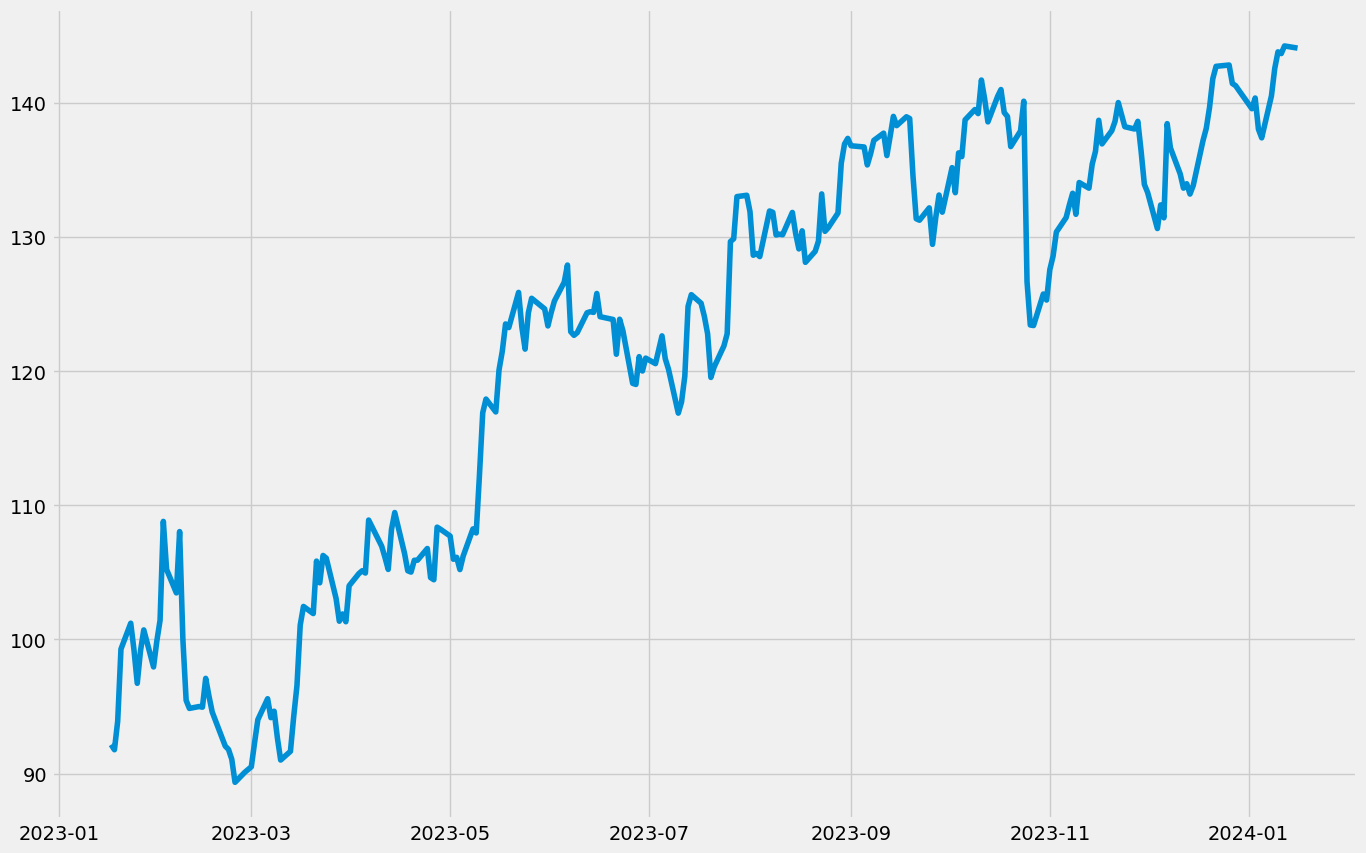

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

#**Using ARIMA for Time Series Forecasting**
Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

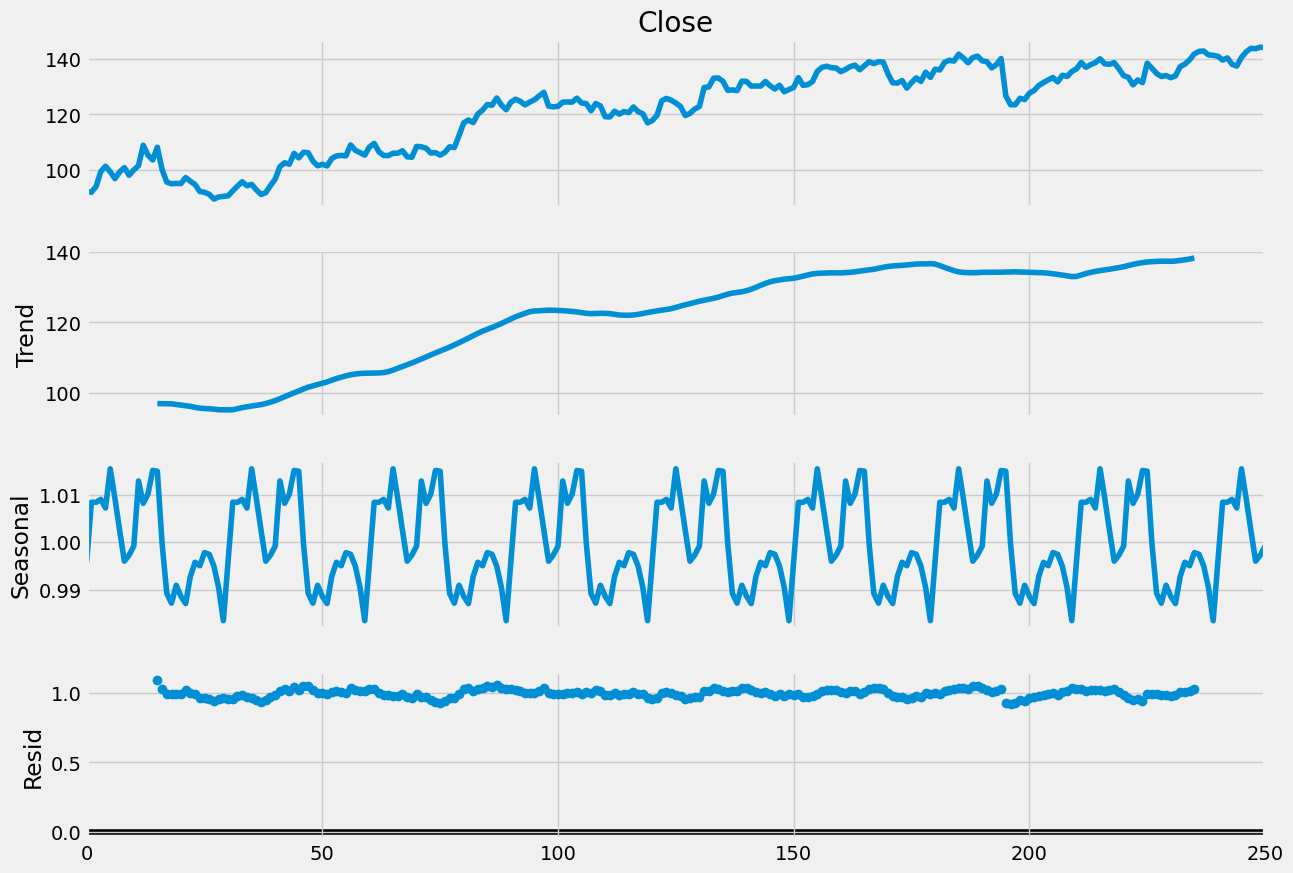

In [15]:
result = seasonal_decompose(data["Close"], model = 'multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

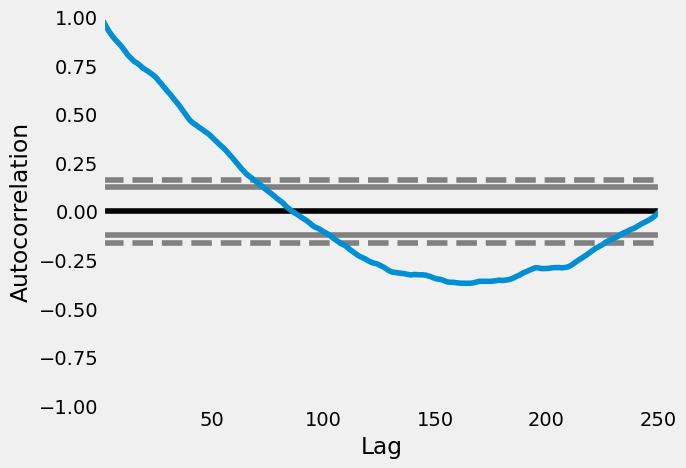

In [16]:
pd.plotting.autocorrelation_plot(data["Close"])

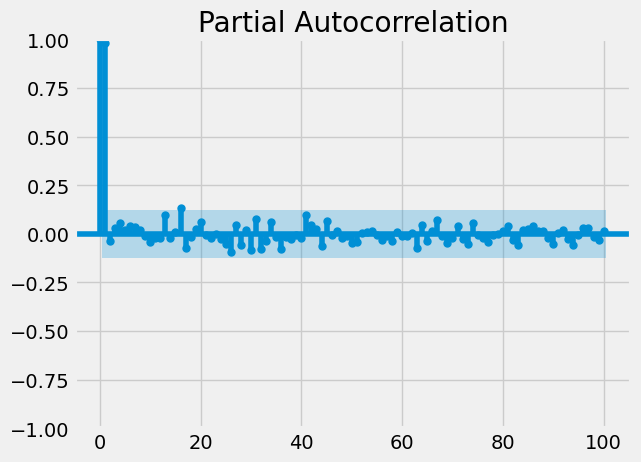

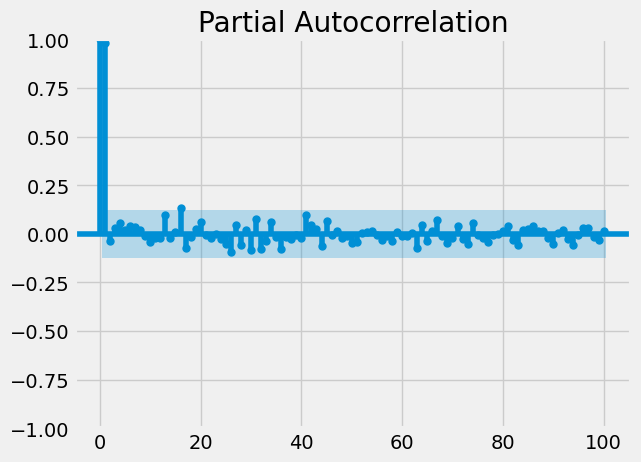

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [20]:
p, d, q = 5, 1, 2

model = ARIMA(data["Close"], order = (p, d, q))
fitted = model.fit()

print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -554.634
Date:                Wed, 17 Jan 2024   AIC                           1125.269
Time:                        09:21:59   BIC                           1153.440
Sample:                             0   HQIC                          1136.607
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2548      0.192      6.538      0.000       0.879       1.631
ar.L2         -0.8795      0.188     -4.677      0.000      -1.248      -0.511
ar.L3          0.0458      0.120      0.380      0.7

In [21]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1       92.160022
2       91.764910
3       94.007993
4       99.443431
          ...    
246    140.465190
247    142.304146
248    143.788909
249    143.902700
250    144.333724
Name: predicted_mean, Length: 251, dtype: float64


In [22]:
import statsmodels.api as sm
import warnings
model = sm.tsa.statespace.SARIMAX(data['Close'],
                                  order = (p, d, q),
                                  seasonal_order = (p, d, q, 12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -541.170
Date:                            Wed, 17 Jan 2024   AIC                           1112.341
Time:                                    09:24:36   BIC                           1164.425
Sample:                                         0   HQIC                          1133.332
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4292      0.090     15.864      0.000       1.253       1.606
ar.L2         -1.0038      0.138   

In [23]:
predictions = model.predict(len(data), len(data) + 10)
print(predictions)

251    144.945069
252    146.263826
253    146.809355
254    146.615559
255    144.093981
256    142.745008
257    143.665077
258    144.143232
259    145.224599
260    146.307115
261    146.965411
Name: predicted_mean, dtype: float64


<Axes: >

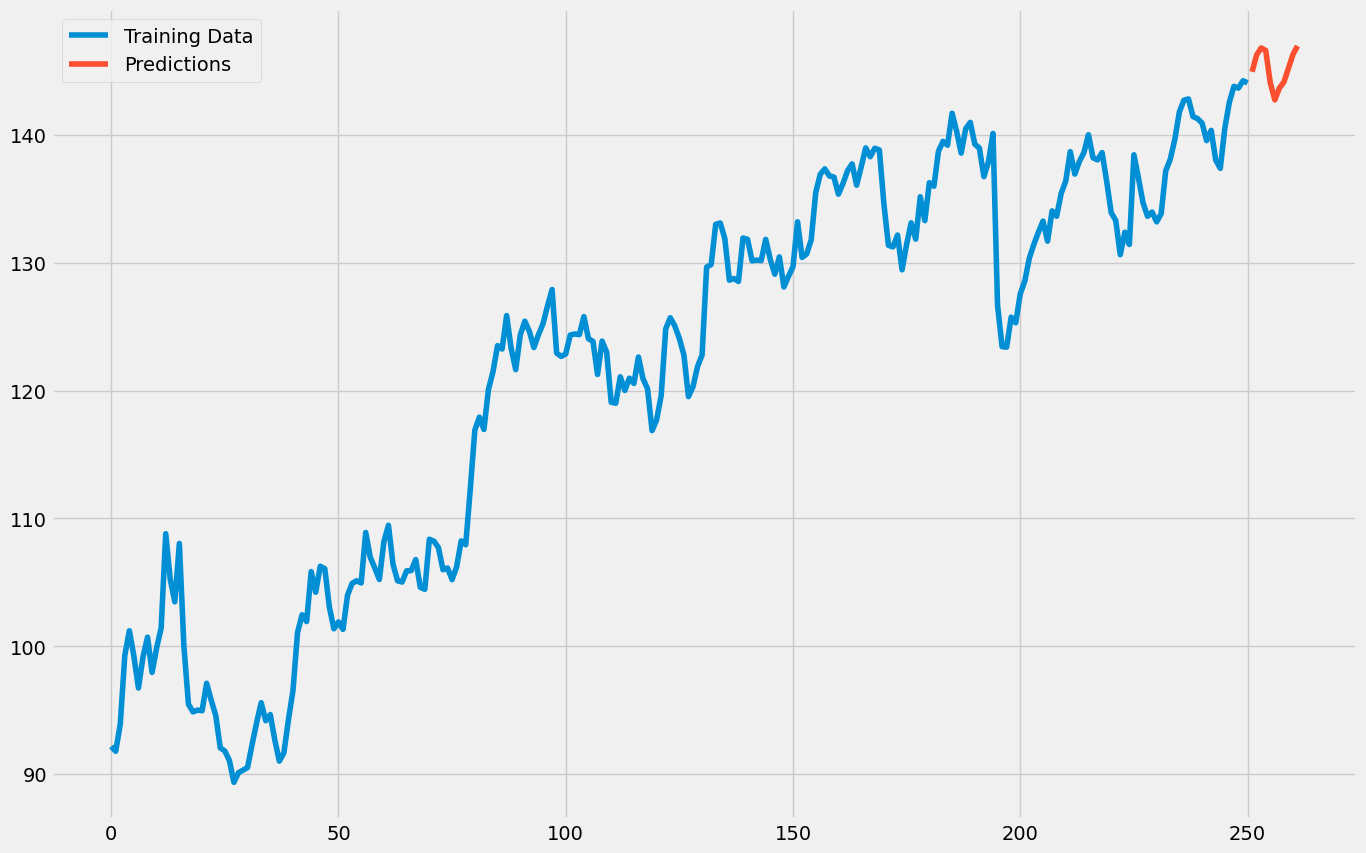

In [24]:
data["Close"].plot(legend = True, label = "Training Data", figsize = (15, 10))
predictions.plot(legend = True, label = "Predictions")

#**Summary**
`ARIMA` stands for `Autoregressive Integrated Moving Average`. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA).